## Multi-Class Modeling using Train-Test-Split

In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# read in multiclass_modeling datafile
df = pd.read_csv('data/multiclass_modeling.csv', header=0)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f69,f70,f71,f72,f73,f74,f75,f76,f77,Y
0,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,0,0,9.0,0
1,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,0,0,9.0,0


In [4]:
# drop highly influential features that are suspected to be driving the models 
df = df.drop(['f3','f12','f25'], axis=1)
df.columns

Index(['f0', 'f1', 'f2', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22',
       'f23', 'f24', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33',
       'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43',
       'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53',
       'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63',
       'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73',
       'f74', 'f75', 'f76', 'f77', 'Y'],
      dtype='object')

In [5]:
# Split data into features and targets
X = df.iloc[:, :-1] # Features
Y = df.Y # Target 

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the targets 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Decision Tree

In [6]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019)

# fit model 
dt = dt.fit(X_train_resample,Y_train_resample)

# predict target 
Y_pred = dt.predict(X_test)

In [7]:
# print F1 score for the decision tree 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.6750556587490819
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      5612
           1       0.76      0.69      0.72      8692
           2       0.15      0.23      0.18      1532

    accuracy                           0.66     15836
   macro avg       0.55      0.55      0.55     15836
weighted avg       0.69      0.66      0.68     15836

[[4132  981  499]
 [1173 5973 1546]
 [ 314  868  350]]


Text(0.5, 12.5, 'Predicted label')

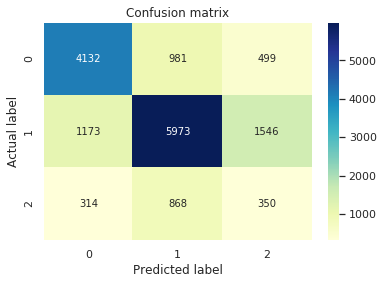

In [8]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
# define the decision tree feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

f77    0.245308
f2     0.082891
f0     0.056375
f1     0.054118
f24    0.052286
f23    0.051295
f9     0.043615
f8     0.032522
f11    0.028395
f16    0.028053
f7     0.024346
f10    0.022893
f6     0.021105
f20    0.018900
f15    0.017084
f74    0.015758
f18    0.013834
f32    0.011963
f64    0.011777
f31    0.009976
f14    0.009821
f22    0.009744
f19    0.009681
f45    0.008782
f34    0.008108
f54    0.007852
f55    0.007800
f26    0.007683
f17    0.007171
f75    0.006142
         ...   
f42    0.002253
f35    0.001954
f72    0.001587
f40    0.001556
f68    0.001378
f73    0.001286
f53    0.001200
f69    0.000968
f38    0.000940
f49    0.000911
f58    0.000893
f63    0.000874
f66    0.000766
f41    0.000728
f46    0.000685
f70    0.000655
f43    0.000648
f27    0.000559
f71    0.000556
f60    0.000548
f76    0.000524
f61    0.000470
f28    0.000306
f65    0.000243
f67    0.000159
f52    0.000030
f47    0.000000
f5     0.000000
f4     0.000000
f21    0.000000
Length: 75, dtype: float

In [10]:
# save the results to a dataframe and csv file 
dfi_dt = pd.DataFrame(feature_imp)
dfi_dt.to_csv('feature_imp/selectedfeatures_tweaked_mm_tt_dt.csv')

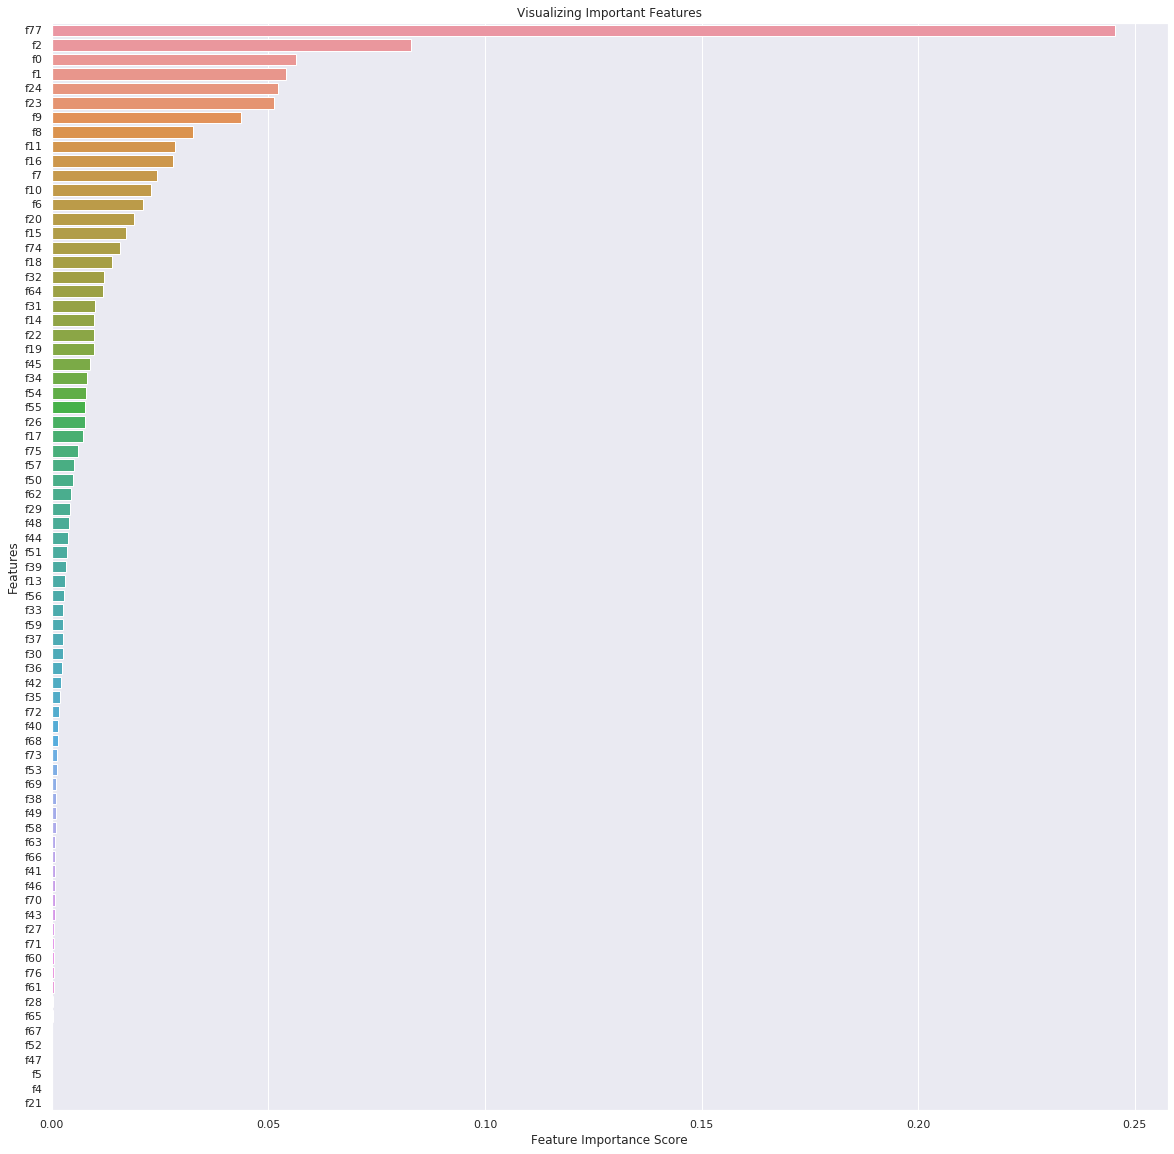

<Figure size 432x288 with 0 Axes>

In [11]:
# visualize the decision tree feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=feature_imp.index, x=feature_imp)

# Add labels & title 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save figure 
plt.savefig('images/mm_tt_dt_selectedfeatures_tweaked_feature_importance.PNG')

### 5. XGBoost

In [12]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019) # max_depth=25, learning_rate=0.1, colsample_bytree=0.4, random_state=2019)

# fit the training data to the model 
xg = xg.fit(X_train_resample,Y_train_resample) 

# predict target 
Y_pred=xg.predict(X_test)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74'] ['f0', 'f1', 'f2', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77']
expected f25, f12, f3 in input data
training data did not have the following fields: f76, f77, f75

In [14]:
# print F1 score for xgboost model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.6750556587490819
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      5612
           1       0.76      0.69      0.72      8692
           2       0.15      0.23      0.18      1532

    accuracy                           0.66     15836
   macro avg       0.55      0.55      0.55     15836
weighted avg       0.69      0.66      0.68     15836

[[4132  981  499]
 [1173 5973 1546]
 [ 314  868  350]]


Text(0.5, 12.5, 'Predicted label')

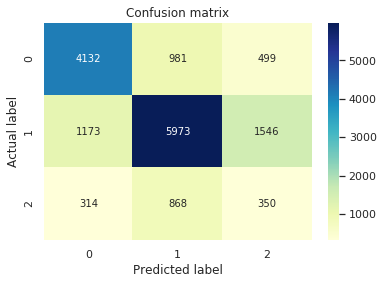

In [15]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
# define the xgboost feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp

f77    0.239395
f11    0.076468
f9     0.061506
f15    0.057955
f59    0.048218
f2     0.046593
f20    0.044139
f10    0.041475
f16    0.040162
f19    0.027200
f32    0.017701
f1     0.016841
f8     0.015441
f0     0.014802
f23    0.013843
f14    0.012662
f31    0.011980
f74    0.011666
f61    0.010474
f24    0.010345
f29    0.009459
f6     0.008889
f30    0.008263
f36    0.007926
f75    0.007900
f7     0.007888
f17    0.007763
f18    0.007710
f45    0.007656
f62    0.007616
         ...   
f33    0.003585
f39    0.001951
f63    0.001739
f64    0.001589
f49    0.000093
f65    0.000000
f56    0.000000
f4     0.000000
f5     0.000000
f55    0.000000
f53    0.000000
f73    0.000000
f72    0.000000
f71    0.000000
f70    0.000000
f52    0.000000
f69    0.000000
f37    0.000000
f68    0.000000
f47    0.000000
f46    0.000000
f67    0.000000
f66    0.000000
f21    0.000000
f43    0.000000
f42    0.000000
f38    0.000000
f26    0.000000
f27    0.000000
f40    0.000000
Length: 75, dtype: float

In [17]:
# save the results to a dataframe and csv file 
dfi_xg = pd.DataFrame(xgb_feature_imp)
dfi_xg.to_csv('feature_imp/selectedfeatures_tweaked_mm_tt_xgb.csv')

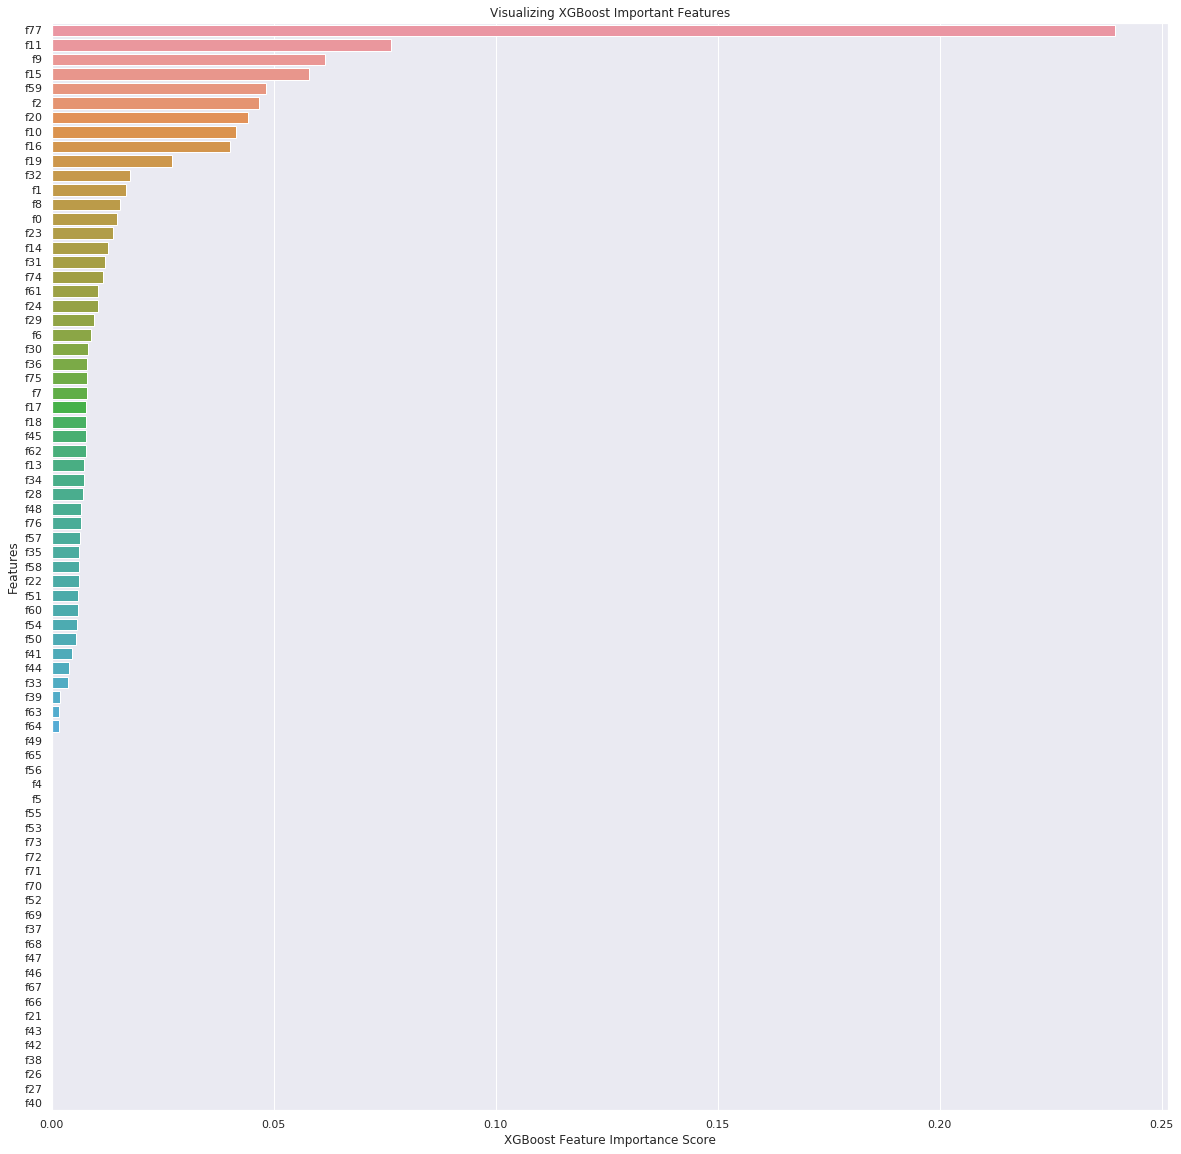

<Figure size 432x288 with 0 Axes>

In [18]:
# visualize the adaboost feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=xgb_feature_imp.index, x=xgb_feature_imp)

# Add labels & title 
plt.xlabel('XGBoost Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing XGBoost Important Features")
plt.show()

# save figure 
plt.savefig('images/mm_tt_xgb_selectedfeatures_tweaked_feature_importance.PNG')

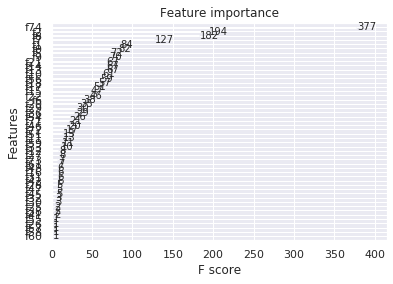

<Figure size 720x720 with 0 Axes>

In [19]:
# visualize the xgboost feature importances 
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()
plt.savefig('images/selectedfeatures_mm_tt_xgbtweaked_other_feature_importance.PNG')

## 6. Random Forest

In [20]:
# build random forest model 
rf = RandomForestClassifier(n_estimators=100, max_depth=23, min_samples_split=5,
                            min_samples_leaf=1, max_features=35, random_state=2019)

# fit model 
rf = rf.fit(X_train_resample, Y_train_resample)

# predict the target 
Y_pred = rf.predict(X_test)

In [21]:
# print F1 score for the random forest model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.727960621703065
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5612
           1       0.78      0.78      0.78      8692
           2       0.17      0.20      0.19      1532

    accuracy                           0.72     15836
   macro avg       0.59      0.59      0.59     15836
weighted avg       0.73      0.72      0.73     15836

[[4316  935  361]
 [ 747 6818 1127]
 [ 259  960  313]]


Text(0.5, 12.5, 'Predicted label')

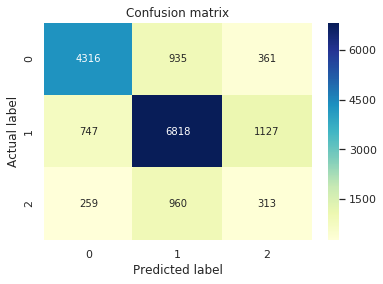

In [22]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
# define the random forest feature importance variable
rf_feature_imp = pd.Series(rf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
rf_feature_imp

f77    0.267996
f2     0.084549
f1     0.065155
f0     0.058915
f23    0.045619
f24    0.045422
f9     0.034734
f8     0.031156
f11    0.027317
f7     0.026421
f6     0.023875
f16    0.023827
f10    0.023738
f15    0.023393
f20    0.019180
f74    0.012316
f18    0.011977
f32    0.011248
f59    0.011138
f19    0.009735
f22    0.009163
f31    0.008745
f64    0.008716
f14    0.008088
f45    0.007390
f17    0.006979
f55    0.006640
f26    0.006373
f54    0.006284
f34    0.006148
         ...   
f73    0.001604
f42    0.001588
f40    0.001568
f35    0.001559
f68    0.001328
f53    0.001319
f72    0.001307
f63    0.000995
f49    0.000834
f69    0.000781
f43    0.000751
f58    0.000740
f38    0.000680
f41    0.000661
f70    0.000658
f61    0.000623
f66    0.000571
f46    0.000522
f60    0.000520
f27    0.000507
f71    0.000489
f76    0.000475
f28    0.000240
f65    0.000230
f67    0.000127
f52    0.000071
f47    0.000012
f21    0.000000
f5     0.000000
f4     0.000000
Length: 75, dtype: float

In [24]:
# save results to a dataframe and csv file 
dfi_rf = pd.DataFrame(rf_feature_imp)
dfi_rf.to_csv('feature_imp/selectedfeatures_tweaked_mm_tt_rf.csv')

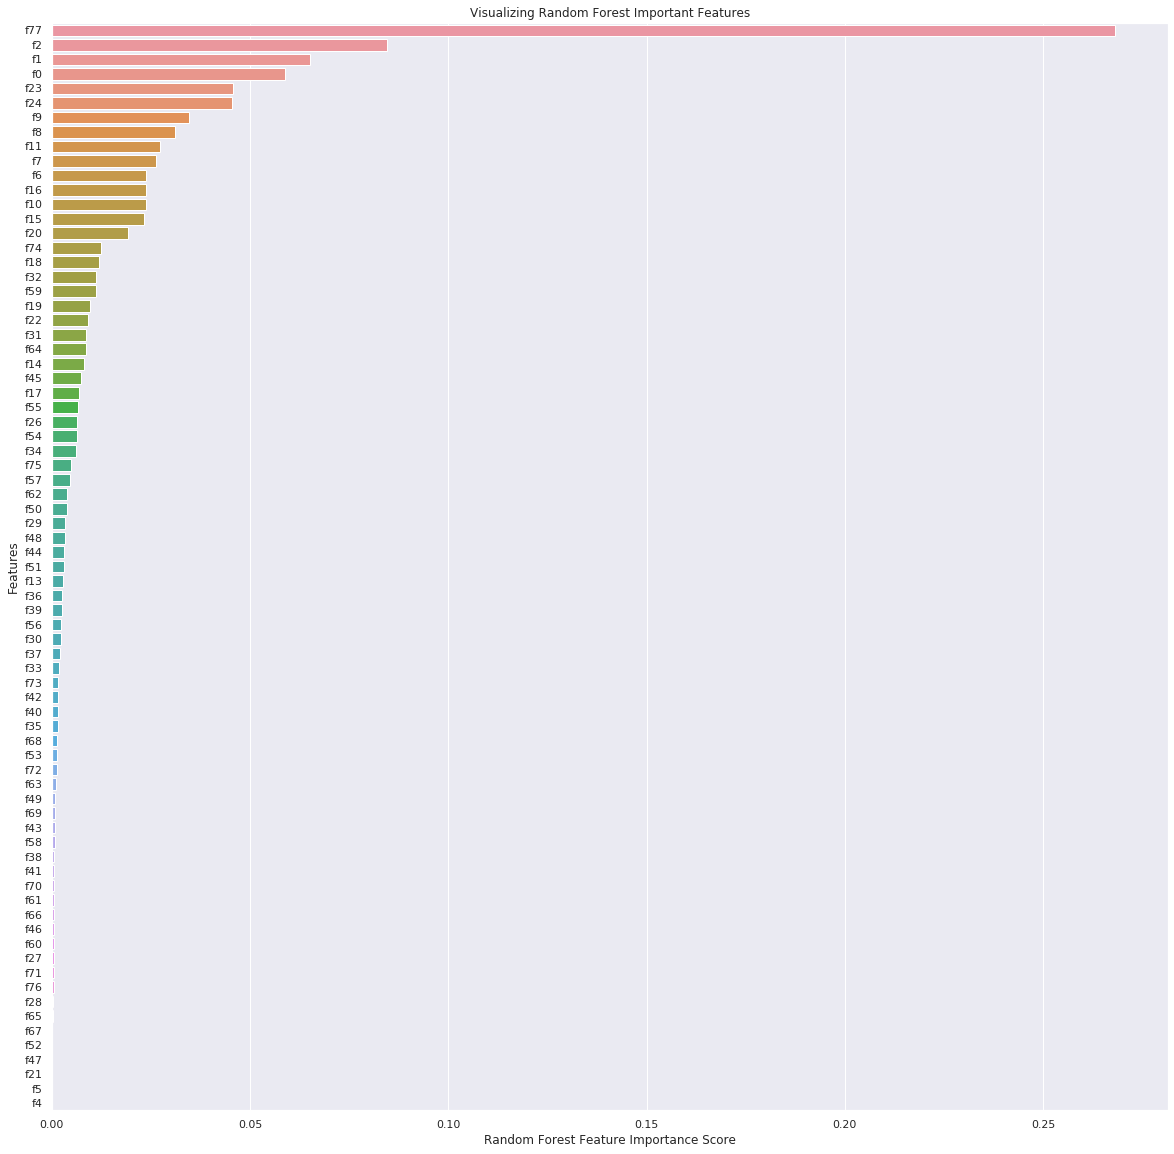

<Figure size 720x720 with 0 Axes>

In [25]:
# visualize the random forest feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=rf_feature_imp.index, x=rf_feature_imp)

# Add labels & title 
plt.xlabel('Random Forest Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()

# save figure
plt.savefig('images/mm_tt_rf_selectedfeatures_tweaked_feature_importance.PNG')